# Packages

In [29]:
using Pkg; Pkg.activate("."); 
using TSO
using PyPlot

  Activating environment at `/cobra/u/peitner/Turbospectrum/opacity_tables/TSO.jl/examples/converting_tables/Project.toml`


# TurboS table for comparison

In [30]:
eosTSO       = reload(TSO.SqEoS, "../../../tests/TSO_sun_Magg_v10.2/eos.hdf5")
eosLEG       = reload(TSO.SqEoS, "/u/peitner/Turbospectrum/stagger_eos/legacy2squaregas/eos_sun_legacy.hdf5")
opacitiesTSO = reload(TSO.SqOpacity, "../../../tests/TSO_sun_Magg_v10.2/binned_opacities.hdf5");

In [31]:
eosTSO_up = TSO.upsample(eosTSO, :lnEi, 2000)
eosLEG_up = TSO.upsample(eosLEG, :lnEi, 2000);

# Read the AESOPUS tables for comparison

In [32]:
pathE = "EOS_OPACITY_MPIA/ener_z0.0165_x0.7351_MBS22_n1458.tab"
pathK = "EOS_OPACITY_MPIA/kross_z0.0165_x0.7351_MBS22_n1458.tab"
pathN = "EOS_OPACITY_MPIA/nelec_z0.0165_x0.7351_MBS22_n1458.tab"
pathP = "EOS_OPACITY_MPIA/pgas_z0.0165_x0.7351_MBS22_n1458.tab"
pathS = "EOS_OPACITY_MPIA/sigma_z0.0165_x0.7351_MBS22_n5365.tab";

In [33]:
eosAESO = AesopusEoS(energy=pathE, kross=pathK, pg=pathP, ne=pathN)
opaAESO = AesopusOpacity(eosAESO, sigma=pathS);

In [34]:
eosAESO_e, opaAESO_e = uniform(eosAESO, opaAESO, upsample=2000, switch=true);

# Compare the EoS

In [35]:
get_closest(a, b) = argmin(abs.(a .- b)) 

get_closest (generic function with 1 method)

In [36]:
rho_test = 1e-8
iTSO  = get_closest(eosTSO_up.lnRho,  log(rho_test))
iAESO = get_closest(eosAESO.lnRho, log(rho_test));

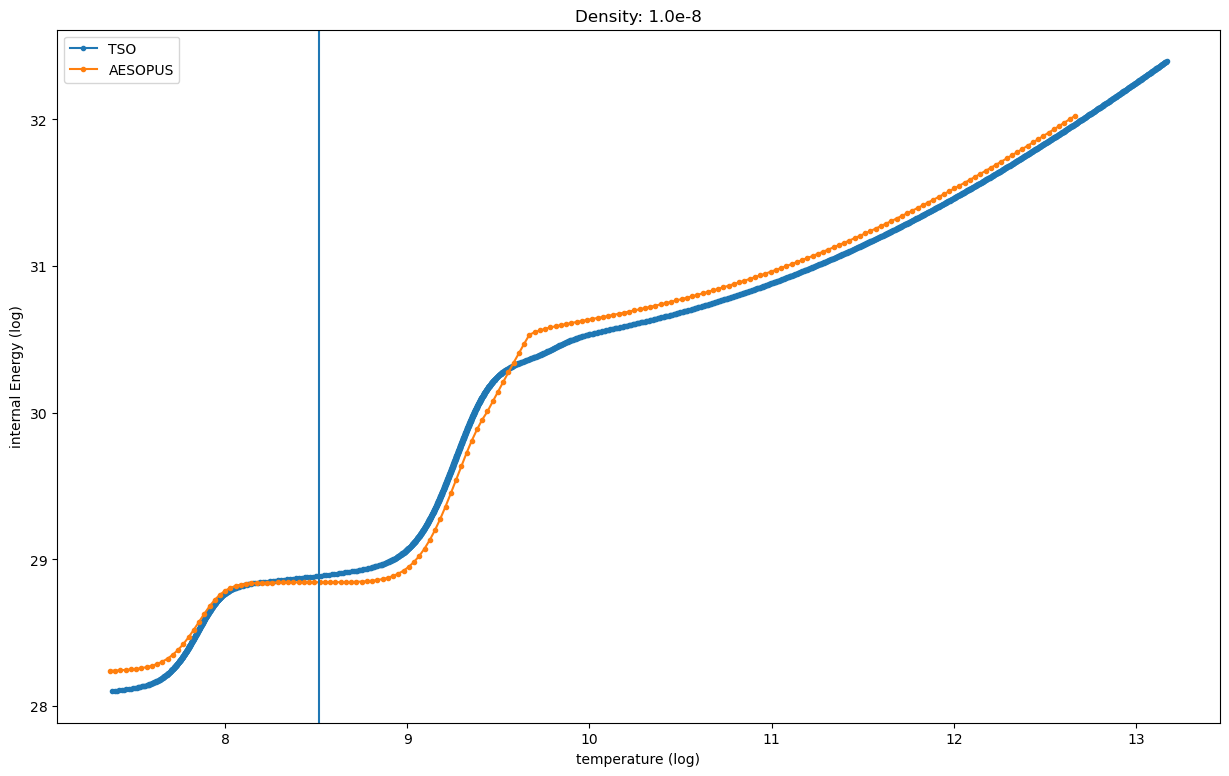

In [37]:
close()

f, ax = plt.subplots(1, 1, figsize=(15,9))

ax.plot(eosTSO_up.lnT[:, iTSO], eosTSO_up.lnEi, label="TSO", marker=".")
ax.plot(eosAESO.lnT, eosAESO.lnEi[:, iAESO], label="AESOPUS", marker=".")

ax.set_title("Density: $(rho_test)")
ax.set_ylabel("internal Energy (log)")
ax.set_xlabel("temperature (log)")

ax.axvline(log(5000))

ax.legend()

gcf()

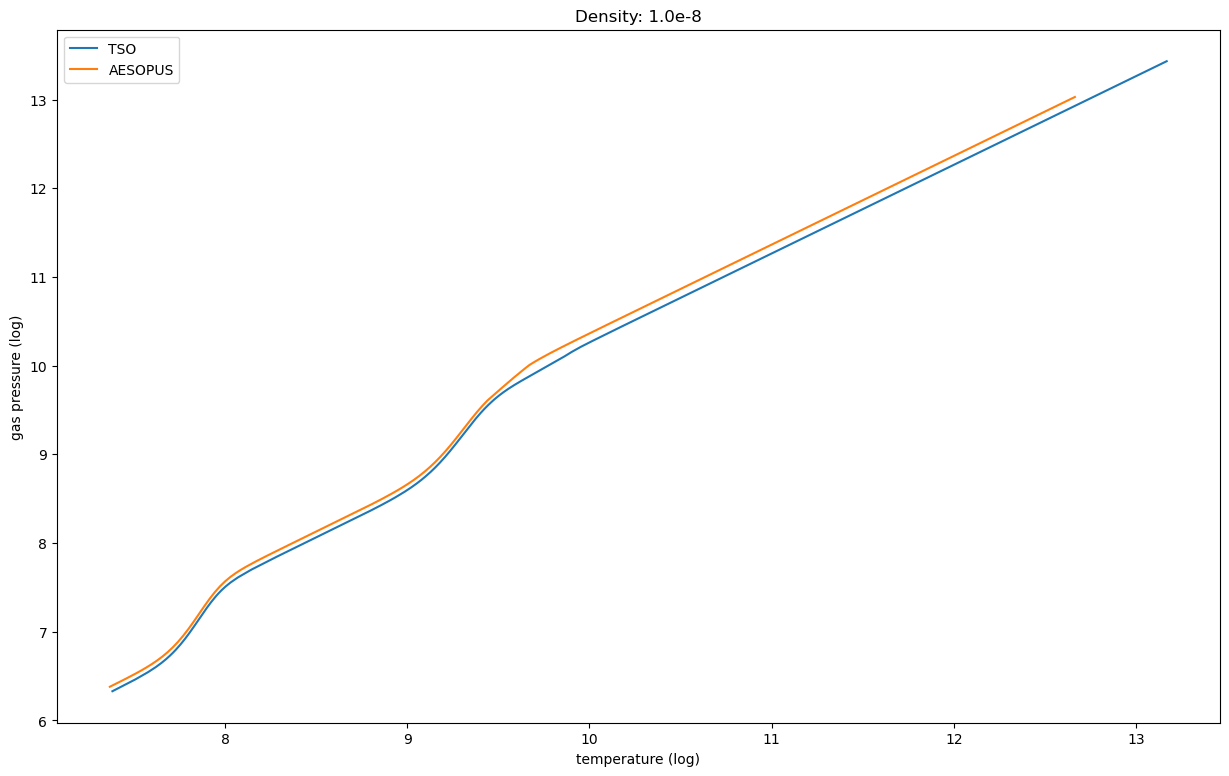

In [38]:
close()

f, ax = plt.subplots(1, 1, figsize=(15,9))

ax.plot(eosTSO.lnT[:, iTSO], eosTSO.lnPg[:, iTSO], label="TSO")
ax.plot(eosAESO.lnT, eosAESO.lnPg[:, iAESO], label="AESOPUS")

ax.set_title("Density: $(rho_test)")
ax.set_ylabel("gas pressure (log)")
ax.set_xlabel("temperature (log)")

ax.legend()

gcf()

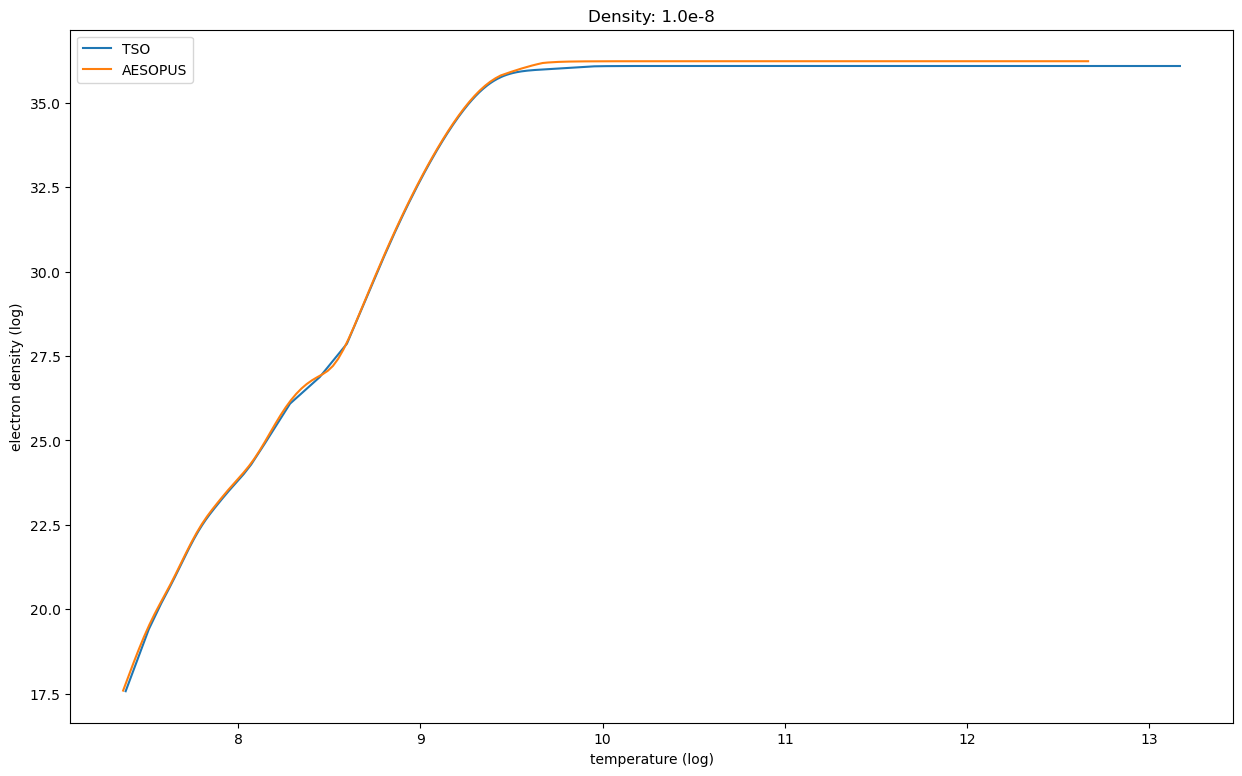

In [39]:
close()

f, ax = plt.subplots(1, 1, figsize=(15,9))

ax.plot(eosTSO.lnT[:, iTSO], eosTSO.lnNe[:, iTSO], label="TSO")
ax.plot(eosAESO.lnT, eosAESO.lnNe[:, iAESO], label="AESOPUS")

ax.set_title("Density: $(rho_test)")
ax.set_ylabel("electron density (log)")
ax.set_xlabel("temperature (log)")

ax.legend()

gcf()

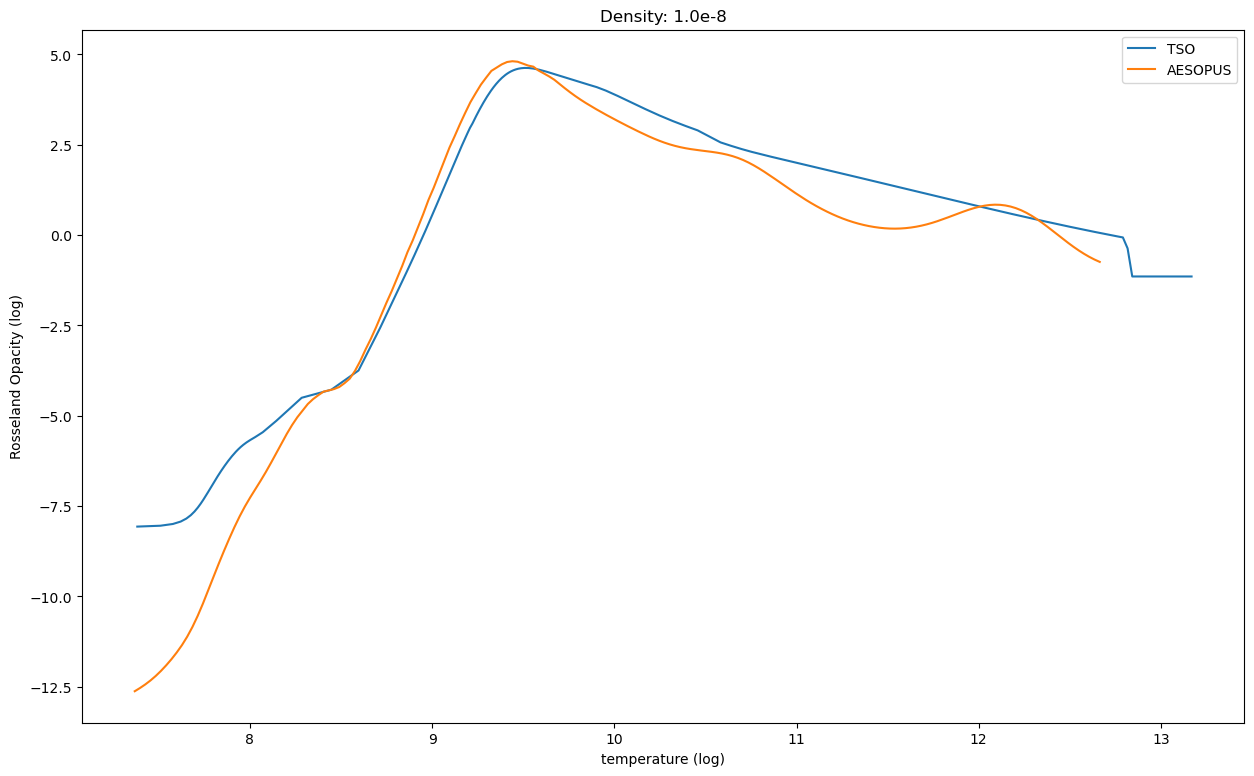

In [40]:
close()

f, ax = plt.subplots(1, 1, figsize=(15,9))

ax.plot(eosTSO.lnT[:, iTSO], eosTSO.lnRoss[:, iTSO], label="TSO")
ax.plot(eosAESO.lnT, eosAESO.lnRoss[:, iAESO], label="AESOPUS")

ax.set_title("Density: $(rho_test)")
ax.set_ylabel("Rosseland Opacity (log)")
ax.set_xlabel("temperature (log)")

ax.legend()

gcf()

# Compare the Opacities

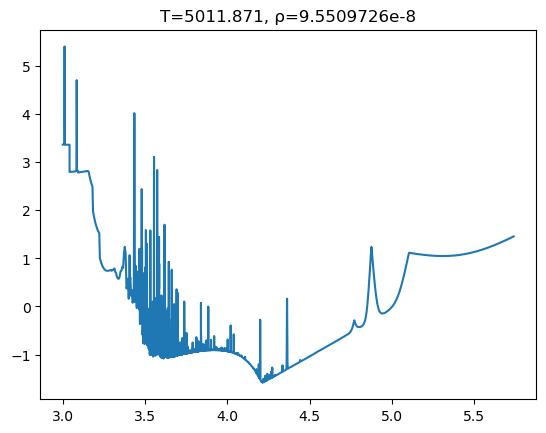

In [41]:
ir = get_closest(eosAESO.lnRho, log(1e-7))
it = get_closest(eosAESO.lnT,   log(5000.))


close()

## Title
plt.title("T=$(exp(eosAESO.lnT[it])), ρ=$(exp(eosAESO.lnRho[ir]))")

## plot
plt.plot(log10.(opaAESO.λ), log10.(opaAESO.κ[it, ir, :]))

gcf()

# Interpolated E-Tables

In [42]:
rho_test = 1e-8
iAESO    = get_closest(eosAESO.lnRho,   log(rho_test));
iAESO_e  = get_closest(eosAESO_e.lnRho, log(rho_test));

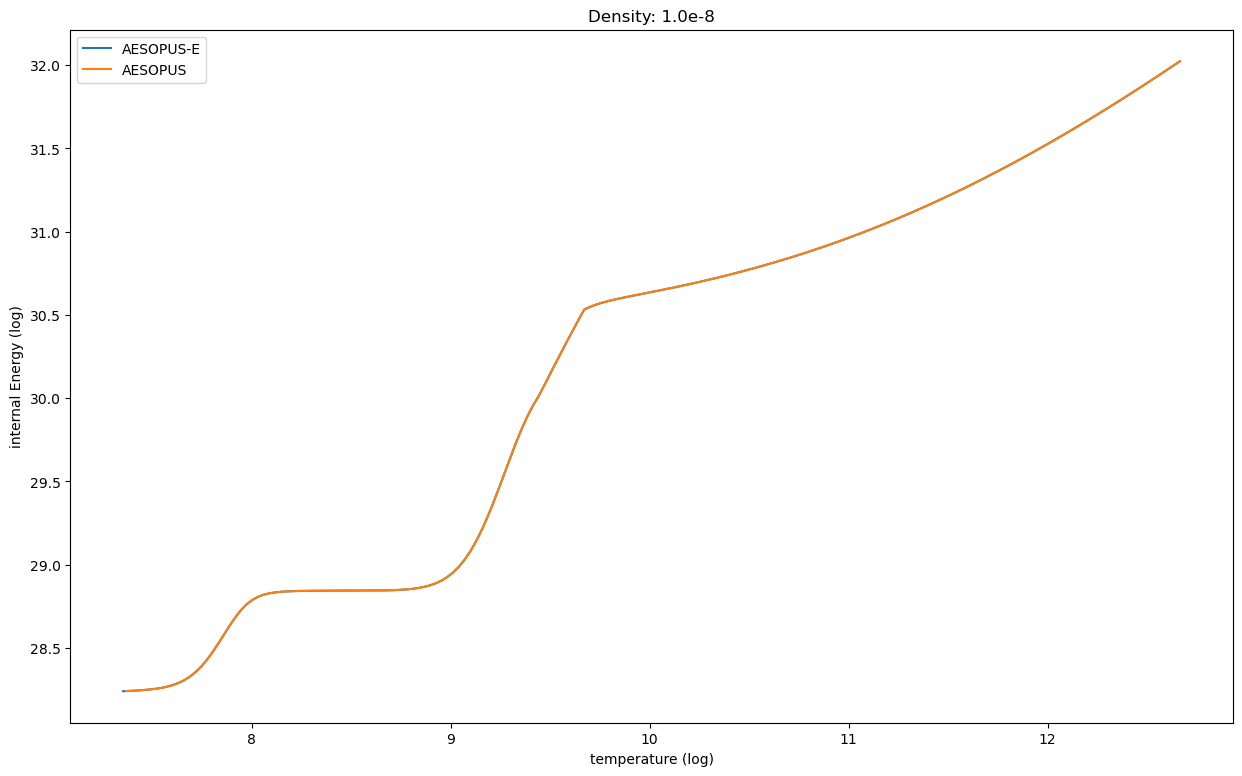

In [43]:
close()

f, ax = plt.subplots(1, 1, figsize=(15,9))

ax.plot(eosAESO_e.lnT[:, iAESO_e], eosAESO_e.lnEi, label="AESOPUS-E")
ax.plot(eosAESO.lnT, eosAESO.lnEi[:, iAESO], label="AESOPUS")

ax.set_title("Density: $(rho_test)")
ax.set_ylabel("internal Energy (log)")
ax.set_xlabel("temperature (log)")

ax.legend()

gcf()

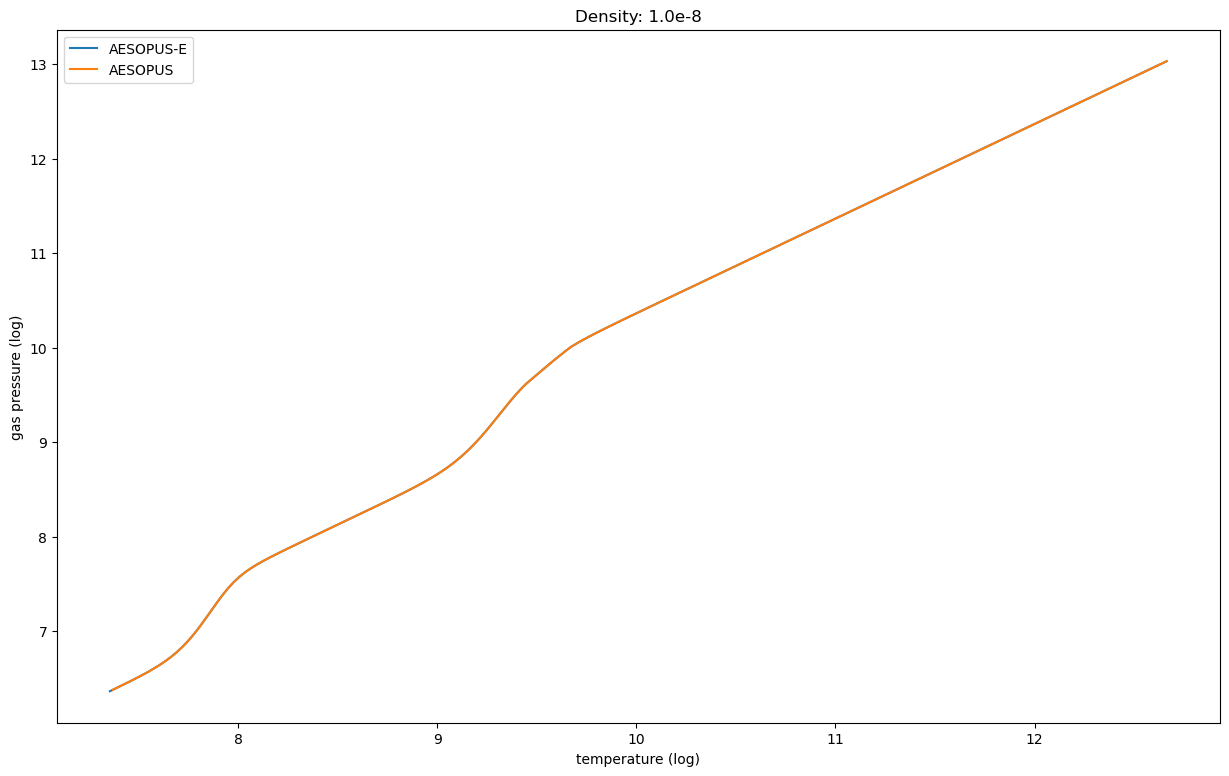

In [44]:
close()

f, ax = plt.subplots(1, 1, figsize=(15,9))

ax.plot(eosAESO_e.lnT[:, iAESO_e], eosAESO_e.lnPg[:, iAESO_e], label="AESOPUS-E")
ax.plot(eosAESO.lnT, eosAESO.lnPg[:, iAESO], label="AESOPUS")

ax.set_title("Density: $(rho_test)")
ax.set_ylabel("gas pressure (log)")
ax.set_xlabel("temperature (log)")

ax.legend()

gcf()

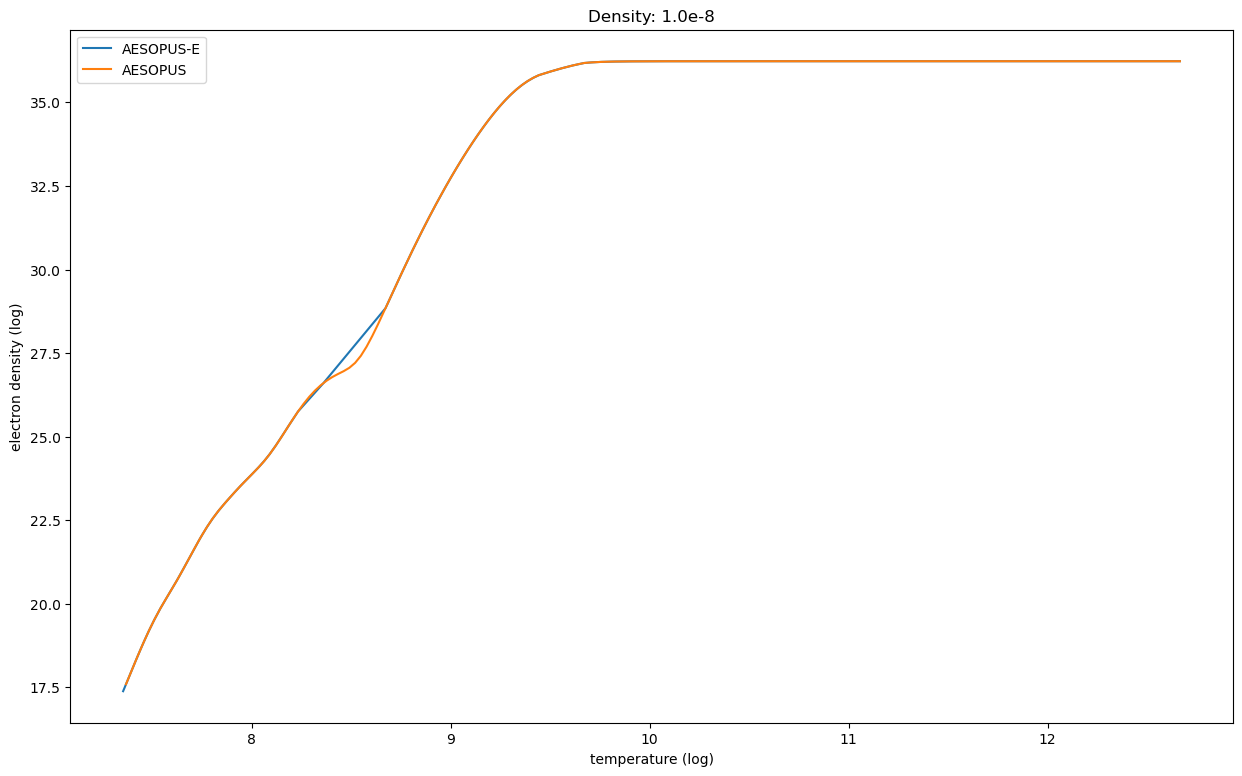

In [45]:
close()

f, ax = plt.subplots(1, 1, figsize=(15,9))

ax.plot(eosAESO_e.lnT[:, iAESO_e], eosAESO_e.lnNe[:, iAESO_e], label="AESOPUS-E")
ax.plot(eosAESO.lnT, eosAESO.lnNe[:, iAESO], label="AESOPUS")

ax.set_title("Density: $(rho_test)")
ax.set_ylabel("electron density (log)")
ax.set_xlabel("temperature (log)")

ax.legend()

gcf()

## Opacities

┌ Info: T=5011.871, ρ=9.5509726e-8
└ @ Main /u/peitner/Turbospectrum/examples/converting_tables/aesopus.ipynb:14
┌ Info: T=5137.9224, ρ=9.5509726e-8
└ @ Main /u/peitner/Turbospectrum/examples/converting_tables/aesopus.ipynb:15


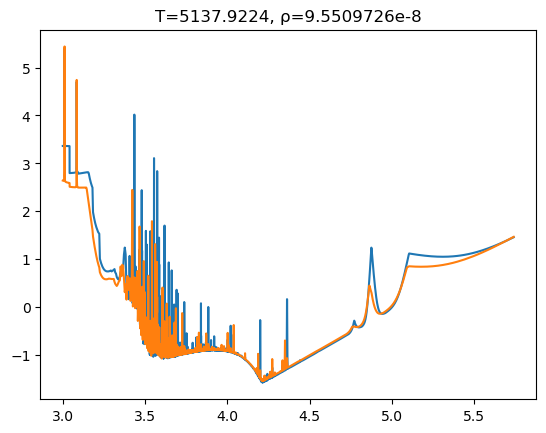

In [46]:
ir = get_closest(eosAESO.lnRho, log(1e-7))
it = get_closest(eosAESO.lnT,   log(5000.))

ir_e = get_closest(eosAESO_e.lnRho, log(1e-7))
it_e = get_closest(eosAESO_e.lnT[:, ir_e], log(5000.))


close()

## Title
plt.title("T=$(exp(eosAESO.lnT[it])), ρ=$(exp(eosAESO.lnRho[ir]))")
plt.title("T=$(exp(eosAESO_e.lnT[it_e, ir_e])), ρ=$(exp(eosAESO_e.lnRho[ir_e]))")

@info "T=$(exp(eosAESO.lnT[it])), ρ=$(exp(eosAESO.lnRho[ir]))"
@info "T=$(exp(eosAESO_e.lnT[it_e, ir_e])), ρ=$(exp(eosAESO_e.lnRho[ir_e]))"


## plot
plt.plot(log10.(opaAESO.λ), log10.(opaAESO.κ[it, ir, :]))
plt.plot(log10.(opaAESO_e.λ), log10.(opaAESO_e.κ[it_e, ir_e, :]))


gcf()

# Trouble with EoS
The AESOPUS EoS seems to be non-monotonic for a unknown reason. This causes problems when interpolating it to a internal energy grid. It also would cause problems in using it in the MHD equations, because at a given internal energy you would have 2 corresponding temperatures. To avoid this one may swith the grid the opacities are tabulated on from one EoS to another. For this we ``complement`` the opacities with a new EoS.

In [47]:
eos_new = deepcopy(eosTSO_up)
opa_regrid = complement(eosAESO, eos_new, opaAESO);

In [48]:
eos_new_LEG = deepcopy(eosLEG_up)
opa_regrid_LEG = complement(eosAESO, eos_new_LEG, opaAESO);

In [49]:
transfer_rosseland!(opa_regrid, eos_new)
transfer_rosseland!(opa_regrid_LEG, eos_new_LEG);

In [50]:
t = 5000
r = 1e-7
e_new    = bisect(eos_new,     lnRho=log(r), lnT=log(t), lnEi=limits(eos_new, 1))
e_new2   = bisect(eosAESO_e,   lnRho=log(r), lnT=log(t), lnEi=limits(eosAESO_e, 1))
e_new3   = bisect(eos_new_LEG, lnRho=log(r), lnT=log(t), lnEi=limits(eos_new_LEG, 1))
kAESO    = [lookup(eosAESO,   opaAESO,    :κ, log(r), log(t), i) for i in eachindex(opaAESO.λ)]
kAESO_e  = [lookup(eosAESO_e, opaAESO_e,  :κ, log(r), e_new2, i) for i in eachindex(opaAESO.λ)]
knew     = [lookup(eos_new,   opa_regrid, :κ, log(r), e_new,  i) for i in eachindex(opaAESO.λ)]
knew_LEG = [lookup(eos_new_LEG,   opa_regrid_LEG, :κ, log(r), e_new3,  i) for i in eachindex(opa_regrid_LEG.λ)];

In [51]:
ie = get_closest(eos_new.lnEi, e_new)
ir = get_closest(eos_new.lnRho, log(r));

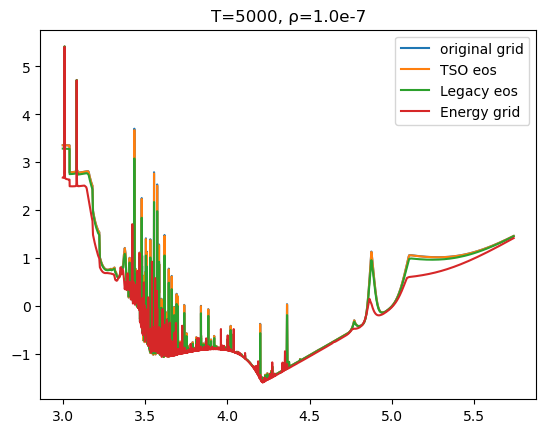

In [52]:
close()

## Title
plt.title("T=$(t), ρ=$(r)")

## plot
plt.plot(log10.(opaAESO.λ),    log10.(kAESO),   label="original grid")
plt.plot(log10.(opa_regrid.λ), log10.(knew),    label="TSO eos")
plt.plot(log10.(opa_regrid_LEG.λ), log10.(knew_LEG), label="Legacy eos")
plt.plot(log10.(opaAESO_e.λ),  log10.(kAESO_e), label="Energy grid")

plt.legend()

gcf()

# Saving the tables
We save the tables on the energy grid with the new EoS. For the future: It may be more wise to proceed with the axed EoS and allow all function until the end to be on a temperature grid (including the binning). Then only the binned table would need to be resampled to a higher resolution, which would be much faster and much easier on the memory.

## AESOPUS + TS EoS

In [53]:
#=dname = "TSO_AESOPUS_v1.1"
save(eos_new,    "combined_eos_AESOPUS_TSO.hdf5")
save(opa_regrid, "combined_opacities_AESOPUS_TSO.hdf5")

## move
!isdir(dname) && mkdir(dname)
mv("combined_eos_AESOPUS_TSO.hdf5",       joinpath(dname, "combined_eos.hdf5"), force=true)
mv("combined_opacities_AESOPUS_TSO.hdf5", joinpath(dname, "combined_opacities.hdf5"), force=true)

open(joinpath(dname, "info"), "w") do f
    write(f, "This folder contains AESOPUS2.0 opacities + TS EoS")
end;=#

## AESOPUS (Resampled E-grid)

In [54]:
#=dname = "TSO_AESOPUS_v1.2"
save(eosAESO_e, "combined_eos_AESOPUS_TSO.hdf5")
save(opaAESO_e, "combined_opacities_AESOPUS_TSO.hdf5")

## move
!isdir(dname) && mkdir(dname)
mv("combined_eos_AESOPUS_TSO.hdf5",       joinpath(dname, "combined_eos.hdf5"), force=true)
mv("combined_opacities_AESOPUS_TSO.hdf5", joinpath(dname, "combined_opacities.hdf5"), force=true)

open(joinpath(dname, "info"), "w") do f
    write(f, "This folder contains AESOPUS2.0 opacities + AESOPUS2.0 respampled Energies")
end;=#

## AESOPUS (T-grid)

In [55]:
#dname = "TSO_AESOPUS_v2.3"
#save(eosAESO, "combined_eos_AESOPUS_TSO.hdf5")
#save(opaAESO, "combined_opacities_AESOPUS_TSO.hdf5")

## move
#!isdir(dname) && mkdir(dname)
#mv("combined_eos_AESOPUS_TSO.hdf5",       joinpath(dname, "combined_eos.hdf5"), force=true)
#mv("combined_opacities_AESOPUS_TSO.hdf5", joinpath(dname, "combined_opacities.hdf5"), force=true)

#open(joinpath(dname, "info"), "w") do f
#    write(f, "This folder contains AESOPUS2.0 opacities + AESOPUS2.0 EoS on T-grid. It contains the source function in cgs.")
#end;